In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!!cd

['E:\\classroom\\ds\\may6\\admission']

In [2]:
df = pd.read_csv("admission.csv")

## Remove Sno from df

In [3]:
df.drop(columns='Sno', inplace=True)

## Info about data

In [5]:
df.head()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 8)

In [7]:
df.columns

Index(['Gre', 'Toefl', 'Rating', 'Sop', 'Lor', 'Cgpa', 'Research', 'Chance'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Gre         500 non-null int64
Toefl       500 non-null int64
Rating      500 non-null int64
Sop         500 non-null float64
Lor         500 non-null float64
Cgpa        500 non-null float64
Research    500 non-null int64
Chance      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [9]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df[['Gre','Cgpa','Chance']].describe()

,Gre,Cgpa,Chance
count,500.000000,500.000000,500.00000
mean,316.472000,8.576440,0.72174
std,11.295148,0.604813,0.14114
min,290.000000,6.800000,0.34000
25%,308.000000,8.127500,0.63000
50%,317.000000,8.560000,0.72000
75%,325.000000,9.040000,0.82000
max,340.000000,9.920000,0.97000


## Data Visualization 

### Univariate Analysis

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


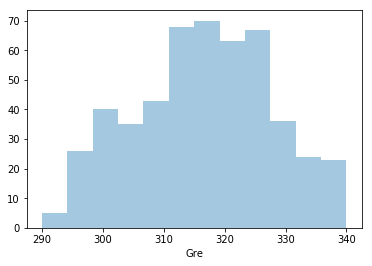

In [11]:
sns.distplot(df['Gre'], kde=False)

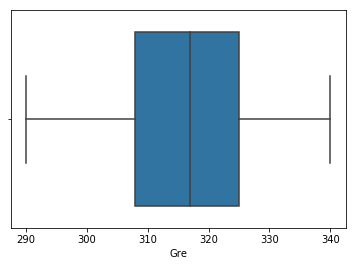

In [12]:
sns.boxplot(df['Gre'])

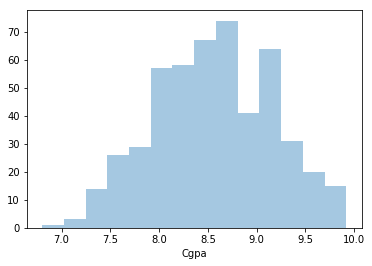

In [16]:
sns.distplot(df['Cgpa'], kde=False)

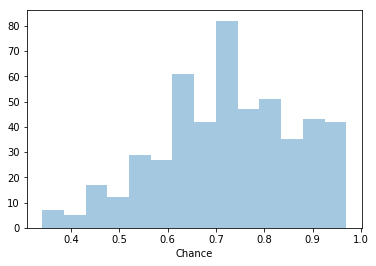

In [17]:
sns.distplot(df['Chance'], kde=False)

In [21]:
(df['Chance']  >= 0.75).sum() , (df['Chance']  < 0.75).sum()

(218, 282)

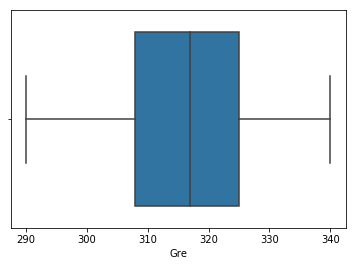

In [22]:
sns.boxplot(x='Gre',data=df)

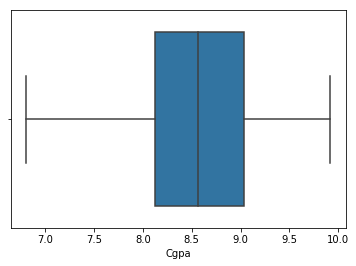

In [23]:
sns.boxplot(x='Cgpa',data=df)

### Bi-variate Analysis

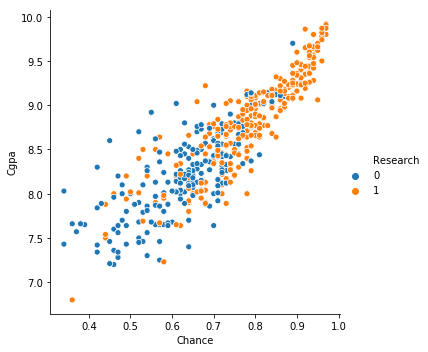

In [25]:
sns.relplot(data=df, x='Chance',y='Cgpa', hue="Research")

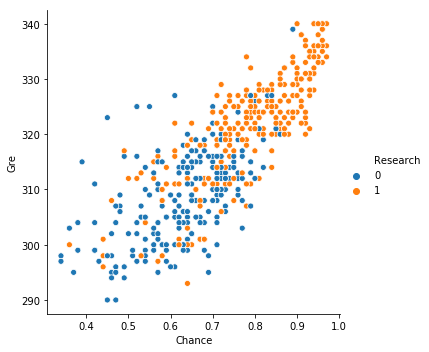

In [26]:
sns.relplot(data=df, x='Chance',y='Gre', hue="Research")

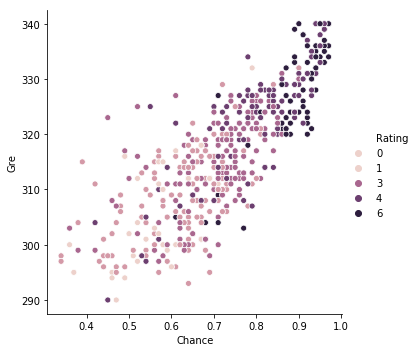

In [27]:
sns.relplot(data=df, x='Chance',y='Gre', hue="Rating")

In [37]:
corrmat = df.corr()

In [38]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


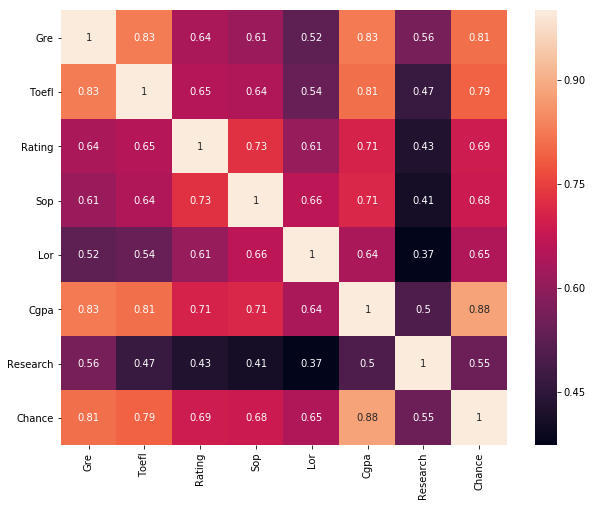

In [39]:
sns.heatmap(corrmat, annot=True)
plt.gcf().set_size_inches(10,8)

In [40]:
df.corr()['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

## Build Machine Learning Model 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
y = df['Chance']

In [16]:
X.shape, y.shape

((500, 7), (500,))

In [18]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, y_train.shape

((400, 7), (400,))

In [20]:
X_train.head()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research
107,338,117,4,3.5,4.5,9.46,1
336,319,110,3,3.0,2.5,8.79,0
71,336,112,5,5.0,5.0,9.76,1
474,308,105,4,3.0,2.5,7.95,1
6,321,109,3,3.0,4.0,8.20,1


In [22]:
X_test.head()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research
90,318,106,2,4.0,4.0,7.92,1
254,321,114,4,4.0,5.0,9.12,0
283,321,111,3,2.5,3.0,8.90,1
445,328,116,5,4.5,5.0,9.08,1
461,301,102,3,2.5,2.0,8.13,1


In [23]:
## Fit model 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Evaluate Model 

In [25]:
## Evaluate Model using test data 
y_pred = model.predict(X_test)

In [28]:
y_pred

array([0.6606252 , 0.83467888, 0.77803235, 0.88054515, 0.60126564,
       0.64356569, 0.53081352, 0.69581338, 0.52494695, 0.74711904,
       0.61091713, 0.70857888, 0.62202889, 0.75371215, 0.88455163,
       0.50857541, 0.82439288, 0.64614159, 0.7656139 , 0.53346257,
       0.51561087, 0.72319839, 0.52118775, 0.92174074, 0.8332172 ,
       0.72651112, 0.69865521, 0.50871376, 0.58246086, 0.59618334,
       0.72743587, 0.48564416, 0.65331018, 0.8414552 , 0.56459962,
       0.59803765, 0.84391714, 0.86746389, 0.59031772, 0.65993134,
       0.67020768, 0.90220251, 0.86565391, 0.72223457, 0.77319666,
       0.8068659 , 0.97014963, 0.85112801, 0.6429692 , 0.65569499,
       0.63193629, 0.6367591 , 0.61353916, 0.80117655, 0.6942999 ,
       0.85574591, 0.52489959, 0.86276624, 0.60022041, 0.63653589,
       0.49798224, 0.90699384, 0.61965598, 0.94547309, 0.7196482 ,
       0.61602013, 0.73614278, 0.8434937 , 0.519103  , 0.77895777,
       0.8947432 , 0.78381774, 0.69730948, 0.63992055, 0.78922

In [27]:
y_test

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
15     0.54
316    0.54
489    0.65
159    0.52
153    0.79
241    0.65
250    0.74
390    0.64
289    0.79
171    0.89
329    0.43
468    0.81
355    0.73
154    0.80
37     0.58
205    0.57
366    0.74
240    0.60
108    0.93
45     0.88
438    0.67
21     0.70
367    0.57
96     0.48
233    0.64
       ... 
142    0.92
65     0.55
340    0.75
484    0.73
175    0.85
362    0.91
264    0.75
100    0.71
491    0.54
295    0.68
300    0.62
235    0.88
475    0.59
219    0.74
330    0.80
326    0.63
421    0.77
157    0.65
348    0.57
54     0.70
220    0.76
402    0.78
379    0.71
200    0.73
179    0.73
372    0.95
56     0.64
440    0.53
60     0.48
208    0.64
Name: Chance, Length: 100, dtype: float64

In [24]:
model.score(X_test,y_test)   # R Squared 

0.7664048993199386

In [30]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

Mean Squared Error : 0.00


In [32]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.77


In [33]:
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Absolute Error : 0.05


### Compact Model 

In [5]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance']

In [7]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred = model.predict(X_test)

In [49]:
model.score(X_test,y_test)

0.7632878240069341

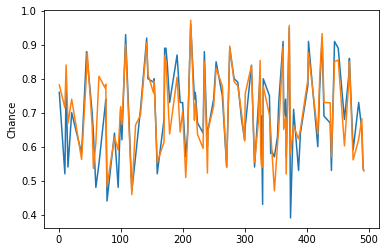

In [68]:
sns.lineplot(x=y_test.index, y=y_test)
sns.lineplot(x=y_test.index, y=y_pred)

## Pickle model 

In [51]:
pd.to_pickle(model,'LR_model.pickle')

## Test Model on user input

In [52]:
# Unpickle model and use it for predicting probability 
model = pd.read_pickle('LR_model.pickle')

In [57]:
data = [329,120,9.6]
result = model.predict([data])
print(f"Probability of getting admission is : {result[0]*100}% ")

Probability of getting admission is : 93.98288283901466% 


In [58]:
prompts = ['GRE','TOEFL','CGPA']
data = []
for p in prompts:
    data.append( input('Enter ' + p + ' : '))

# convert all values to float
for idx,value in enumerate (data):
    data[idx] = float(value)    

    
result = model.predict([data])
print(f"Probability of getting admission is : {result[0]*100}% ")

Enter GRE :  330
Enter TOEFL :  120
Enter CGPA :  9.5


Probability of getting admission is : 92.81046062223433% 


## Using Decision Tree 

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [10]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.4727522581199274

In [116]:
X = df[['Gre','Toefl','Cgpa','Research']]
y = df['Chance']

In [117]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [118]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [119]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.5461572596229549

## K-Neighbours algorithm

In [123]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
y = df['Chance']

In [124]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [125]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [126]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.5876265048168453

### Using Classification 

In [151]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
df['result'] = df['Chance'] > 0.80
y = df['result']

In [152]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
y_pred = model.predict(X_test)

In [156]:
# Display consfusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[77,  1],
       [ 0, 22]], dtype=int64)

In [168]:
data = [325,130,5,4.5,4.5,8,0]
result = model.predict([data])
print(f"Will get admission ? : {result[0]}")

Will get admission ? : True
